In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [4]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

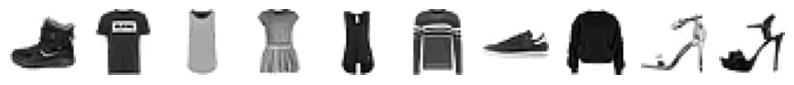

In [5]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r 현재색 반전
    axs[i].axis('off')                          # 그래프 눈금 없애기
plt.show()

In [6]:
len(train_input[0][0])
train_input.shape

(60000, 28, 28)

In [7]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28)  # flatten층에서 사이즈 그대로 적용 28*28(배열화)
train_scaled.shape

(60000, 28, 28)

In [8]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# epochs = 20 => 훈련세트 정확도가 높아짐
# 검증세트를 가지고 정확도를 특정

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy값을 저장
history = model.fit(train_scaled, train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7655 - loss: 0.6712
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.4059
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8675 - loss: 0.3628
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3276
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3082
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8935 - loss: 0.2930
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8959 - loss: 0.2792
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9009 - loss: 0.2640
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9047 - loss: 0.2554
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9096 - loss: 0.2412
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9113 - loss: 0.2340
Epoch 12/20
1500/1500 ━━━━━━━━

In [13]:
# histroy kyes index 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [14]:
# train세트 검증데이터 (loss, accuracy) 그래프 -  history

In [15]:
# 변수.history[]
history.history['loss']
history.history['accuracy']

[0.8143125176429749,
 0.8586249947547913,
 0.8712916374206543,
 0.8807708621025085,
 0.8865000009536743,
 0.8923958539962769,
 0.8952083587646484,
 0.9004791378974915,
 0.9039999842643738,
 0.9071666598320007,
 0.9106666445732117,
 0.9127500057220459,
 0.9144583344459534,
 0.9176666736602783,
 0.9226666688919067,
 0.921708345413208,
 0.9242083430290222,
 0.9276875257492065,
 0.9293333292007446,
 0.9310208559036255]

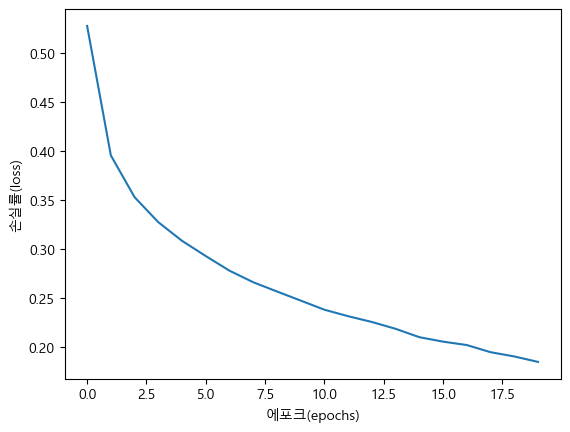

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.savefig('m0529_03',dpi=300)  # 파일저장
plt.show()

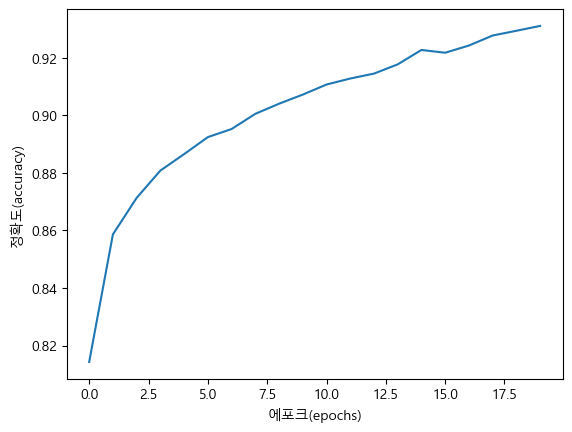

In [17]:
# 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300)  # 파일저장
plt.show()

In [18]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8868 - loss: 0.3444


[0.3419915437698364, 0.8891666531562805]

In [19]:
# 검증(val) 세트도 함께 검증 - history 정보로 받을 수 있음
# model.fit -  loss, accuracy 정보를 리턴(history)

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target,epochs=20, 
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9317 - loss: 0.1803 - val_accuracy: 0.8822 - val_loss: 0.3662
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9362 - loss: 0.1714 - val_accuracy: 0.8868 - val_loss: 0.3711
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9393 - loss: 0.1636 - val_accuracy: 0.8827 - val_loss: 0.3716
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9363 - loss: 0.1672 - val_accuracy: 0.8880 - val_loss: 0.3602
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9377 - loss: 0.1651 - val_accuracy: 0.8862 - val_loss: 0.3787
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9426 - loss: 0.1574 - val_accuracy: 0.8868 - val_loss: 0.3692
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9407 - loss: 0.1564 - val_accuracy: 0.8836 - val_loss: 0.3807
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9416 - loss: 0.1529 - 

In [21]:
# 총4개 속성 = train세트 2개(accuracy, loss), test세트 2개(val_accuracy,val_loss)
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
history.history['loss']


[0.18004542589187622,
 0.17414377629756927,
 0.17210309207439423,
 0.16692081093788147,
 0.1655857264995575,
 0.1589529663324356,
 0.15700197219848633,
 0.15387186408042908,
 0.14752094447612762,
 0.14476950466632843,
 0.14548993110656738,
 0.14093689620494843,
 0.13589702546596527,
 0.13538220524787903,
 0.13054858148097992,
 0.12875492870807648,
 0.12676846981048584,
 0.12471379339694977,
 0.12347564846277237,
 0.1175355315208435]

In [23]:
history.history['val_loss']

[0.3661840558052063,
 0.371138334274292,
 0.3716408610343933,
 0.36024487018585205,
 0.37873145937919617,
 0.36923515796661377,
 0.3806651532649994,
 0.38716834783554077,
 0.38228654861450195,
 0.4064289927482605,
 0.3906586766242981,
 0.40185534954071045,
 0.401222825050354,
 0.4114587903022766,
 0.40032103657722473,
 0.41127580404281616,
 0.41914382576942444,
 0.43866220116615295,
 0.4440731704235077,
 0.4419768154621124]

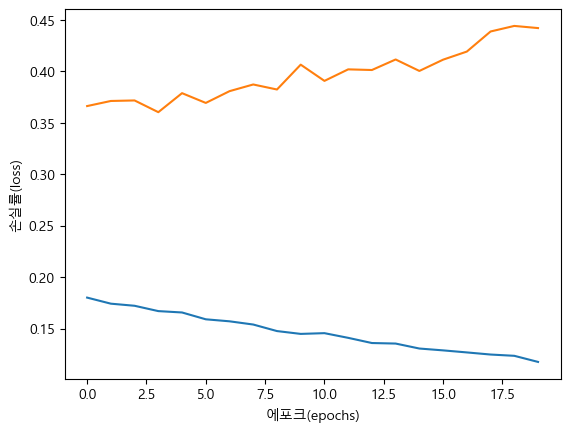

In [24]:
# 정확도
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300)  # 파일저장
plt.show()
# => 격차가 너무 큼

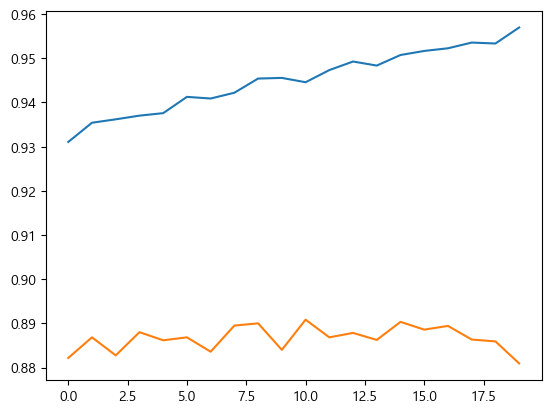

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()